# Recursive technical homework

## Motivation
We hope you have fun doing this task as well as learn something new.

Do not be discouraged if you find the task challenging. Feel free to research as much as you want on Google or any other resource to solve this task. You are welcome to copy code snippets from stackoverflow, tutorials, blog posts, etc to help you finish the task. Make sure you understand them though :)

The goal is to push yourself a little and see how you like solving new problems using scientific computing and data analysis.

**About colab**

Please create a duplicate of this notebook using File > Save a Copy in Drive. Share your solution via a link to your local copy of the notebook.

You can solve the entirety of this task using a free kernel running in the cloud. Just click 'Connect' on the top right of the notebook. You can use any python libraries you want *unless* explicitly told to code your own algorithm. If a library you want to use is not already available from the colab runtime, go to 'Help' > 'Search code snippets' > Type 'Importing a library that is not in Colab' to learn how to install a library using pip.


# Part 1
Understanding Stochastic Gradient Descent.
In this exercise, we want to implement [Stochastic Gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) without using a built-in optimizer, to understand how parameters are optimized at the low level.

Let's consider a toy problem of [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression). The data generation process is such that we have one floating point variable $x \in [0,1]$, and one categorical variable $y\in \{0,1\}$. The Logistic Regression problem is to find the optimal parameters for the logistic function to predict the probability of $y$ given $x$.

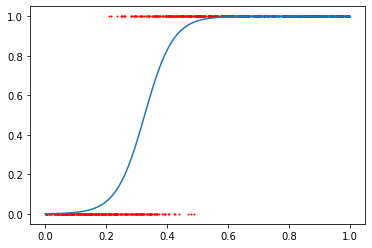

In the image above, the x and y axis correspond to the variables defined previously, with the red "dots" the true data as generated by the process defined below, and the blue line is the optimal logistic decision function learned from the data.

The optimal parameters can be found numerically using gradient descent. In this case, we will be using SGD (batched gradient descent) to optimize the two parameters in the logistic function, $\beta_1, \beta_2$.

If ${p(x)={\frac {1}{1+e^{-(\beta _{1}+\beta _{2}x)}}}}$, then we want to find $\beta_1, \beta_2$ such that the [negative log likelihood](https://en.wikipedia.org/wiki/Likelihood_function) is minimized. In this case, ${\ell =\sum _{k=1}^{K}\left(\,y_{k}\ln(p_{k})+(1-y_{k})\ln(1-p_{k})\right)}$, and the SGD formula is simply:
$\beta_i = \beta_{i-1} - \alpha * \nabla \ell$.

The data generation process as well as the pseudo-code is provided for you below, your task is to fill in the appropriate pytorch code. *Do not use the built-in optimizer*, implement SGD using tensor operations alone.


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [ ]:
def generate_data():
  data = torch.rand(1000, 2)
  label = ((data[:,0]+0.3*data[:,1]) > 0.5).to(torch.int)
  return data[:,0], label

In [ ]:
input, label = generate_data()
print("Shape of input tensor:", input.shape)
print("Shape of label tensor:", label.shape)

Shape of input tensor: torch.Size([1000])
Shape of label tensor: torch.Size([1000])


In [ ]:
input, label = generate_data()

# Make minibatches.
inputs = torch.split(input, 32)
labels = torch.split(label, 32)

# Define the two variables to optimize
b1 = torch.autograd.Variable(torch.tensor([0.01]), requires_grad=True)
b2 = torch.autograd.Variable(torch.tensor([0.01]), requires_grad=True)

alpha = 0.1 # the learning rate

for epoch in range(15):
  epoch_loss = 0
  for x, y in zip(inputs,labels):
    # Calculate p_x as per formula above
    p_x = 1 / (1 + torch.exp(-(b1 + b2 * x)))
    # Calculate the negative log likelihood
    loss = -(y * torch.log(p_x) + (1 - y) * torch.log(1 - p_x)).sum()
    # loss = -torch.sum(y * torch.log(p_x) + (1 - y) * torch.log(1 - p_x))

    # Calculating the gradient of the loss w.r.t. the inputs
    loss.backward()
    # Update the parameters b according to SGD formula
    with torch.no_grad():
        b1 -= alpha * b1.grad
        b2 -= alpha * b2.grad

    # Manually zero the gradients after updating
        b1.grad.zero_()
        b2.grad.zero_()
    # Accumulate loss for printing
        epoch_loss += loss.item()

    # Print out the loss value
    print(f"Epoch {epoch+1}, Loss: {epoch_loss / len(inputs):.4f}")


Epoch 1, Loss: 0.6904
Epoch 1, Loss: 1.2723
Epoch 1, Loss: 1.7686
Epoch 1, Loss: 2.3958
Epoch 1, Loss: 2.8709
Epoch 1, Loss: 3.2950
Epoch 1, Loss: 3.7058
Epoch 1, Loss: 4.1572
Epoch 1, Loss: 4.5513
Epoch 1, Loss: 5.0054
Epoch 1, Loss: 5.4272
Epoch 1, Loss: 5.7877
Epoch 1, Loss: 6.1534
Epoch 1, Loss: 6.5425
Epoch 1, Loss: 6.9591
Epoch 1, Loss: 7.3760
Epoch 1, Loss: 7.7476
Epoch 1, Loss: 8.1162
Epoch 1, Loss: 8.4777
Epoch 1, Loss: 8.8079
Epoch 1, Loss: 9.1596
Epoch 1, Loss: 9.4945
Epoch 1, Loss: 9.7803
Epoch 1, Loss: 10.1461
Epoch 1, Loss: 10.4720
Epoch 1, Loss: 10.7141
Epoch 1, Loss: 11.0044
Epoch 1, Loss: 11.2982
Epoch 1, Loss: 11.5482
Epoch 1, Loss: 11.8646
Epoch 1, Loss: 12.1651
Epoch 1, Loss: 12.2182
Epoch 2, Loss: 0.2740
Epoch 2, Loss: 0.5667
Epoch 2, Loss: 0.8656
Epoch 2, Loss: 1.1893
Epoch 2, Loss: 1.3894
Epoch 2, Loss: 1.6279
Epoch 2, Loss: 1.8697
Epoch 2, Loss: 2.1358
Epoch 2, Loss: 2.3195
Epoch 2, Loss: 2.6132
Epoch 2, Loss: 2.8624
Epoch 2, Loss: 3.0577
Epoch 2, Loss: 3.2543
E

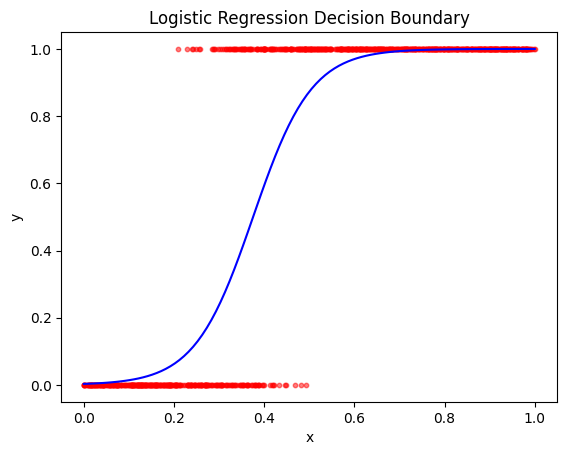

In [ ]:
# Reproduce the image above to validate your result.
x = torch.linspace(0, 1, 100)
decision_boundary = 1 / (1 + torch.exp(-(b1.item() + b2.item() * x)))  # Calculating the decision boundary based on the sigmoid function

plt.scatter(input.numpy(), label.numpy(), s=10, c='red', alpha=0.5)
plt.plot(x.numpy(), decision_boundary.numpy(), color='blue')
plt.xlabel('x') # Input Feature
plt.ylabel('y') # Label
plt.title('Logistic Regression Decision Boundary')
plt.show()

# Part 2-1

Researchers have measured a bivariate timeseries, but the equipment was unreliable so the data has gaps as well as noise. The data can be found in [data.csv](https://gist.github.com/tmramalho/51733432c88e2b834dbd70353849f887)

In this exercise, we want to train an [MLP](https://en.wikipedia.org/wiki/Multilayer_perceptron) to regress the full observed trajectory from the measured data. Formally, the MLP will be used to approximate the function $f:\mathbb{R} \rightarrow \mathbb{R}^2 ; f(t) = (x(t), y(t))$. In other words, the model takes the current time as an input, and predicts the values of `x` and `y` at that time based only on the measured data.

Your task is to define the data loader, the MLP model and the loss function to complete this task successfully. For this problem you will need to use a regression loss, not a classification loss.

Successful training should result in a data interpolation similar to the below:
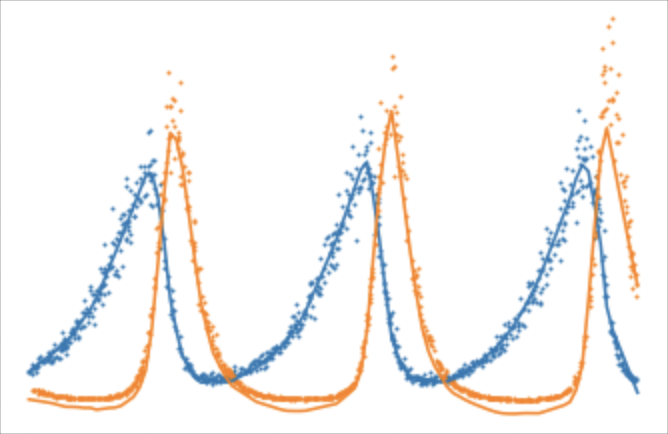

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Net(nn.Module):
    '''Model to regress 2d time series values given scalar input.'''
    def __init__(self):
        super(Net, self).__init__()
        #TODO
        # Define the layers of the MLP
        self.fc1 = nn.Linear(1, 64)  # Input layer (1 -> 64)
        self.fc2 = nn.Linear(64, 64) # Hidden layer (64 -> 64)
        self.fc3 = nn.Linear(64, 2)  # Output layer (64 -> 2)

    def forward(self, x):
        #TODO
        # Forward pass through the network
        x = F.relu(self.fc1(x))  # Apply ReLU activation to the first layer
        x = F.relu(self.fc2(x))  # Apply ReLU activation to the second layer
        x = self.fc3(x)          # Output layer
        return x

In [ ]:
class TimeSeriesDataset(torch.utils.data.Dataset):

    def __init__(self, csv_file):
        #TODO
        # Load the data from the CSV file from the github url
        self.data = pd.read_csv(csv_file)

        # Ensure the columns are numeric
        self.data.iloc[:, 1:3] = self.data.iloc[:, 1:3].apply(pd.to_numeric, errors='coerce')

        self.data = self.data.dropna()  #  remove rows with missing data

        # print(self.data.head())
        # print(self.data.dtypes)
        # self.data.set_index('t', inplace=True)
        print(self.data)

    def __len__(self):
        #TODO
        return len(self.data)

    def __getitem__(self, idx):
        #TODO
        # Retrieve the time value (input) and (x, y) values (target) from the data
        t = torch.tensor([self.data.iloc[idx, 0]], dtype=torch.float32)  # Time input t
        values = torch.tensor(self.data.iloc[idx, 1:3].values.astype(np.float32), dtype=torch.float32)  # Target (x, y)
        return t, values

    # def __getitem__(self, idx):
    #     # Retrieve the time value (input) and (x, y) values (target) from the data
    #     t = torch.tensor([self.data.index[idx]], dtype=torch.float32)  # Use index for time input
    #     values = torch.tensor(self.data.iloc[idx].values.astype(np.float32), dtype=torch.float32)  # Ensure target (x, y) is float32
    #     return t, values

In [ ]:
# loading the dataset with batch size
csv_file = 'https://gist.githubusercontent.com/tmramalho/51733432c88e2b834dbd70353849f887/raw/676636d9e8512963005a318cb9b98060feadb641/data.csv'
dataset = TimeSeriesDataset(csv_file)
BATCH_SIZE = 16  # Define the batch size
trainloader = torch.utils.data.DataLoader(
    dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

def loss_fn(outputs, labels):
  #TODO
  return nn.MSELoss()(outputs, labels)

# Initializing a new instance of the model
net = Net()

optimizer = optim.Adam(net.parameters(), lr=0.01, betas= (0.8, 0.8))  #TODO what is a good optimizer?

          t         x         y
4      0.04  1.005483  0.477527
6      0.06  1.101832  0.460175
13     0.13  1.020803  0.376706
18     0.18  1.165619  0.345918
30     0.30  1.161122  0.397953
...     ...       ...       ...
1968  19.68  0.973341  4.724112
1974  19.74  0.726388  4.360858
1980  19.80  0.737377   3.82263
1984  19.84  0.898905  4.297797
1987  19.87  0.809846  3.549376

[327 rows x 3 columns]


In [ ]:
for epoch in range(300):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 20 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

print('Finished Training')

[1,    20] loss: 0.643
[2,    20] loss: 0.791
[3,    20] loss: 0.698
[4,    20] loss: 0.713
[5,    20] loss: 0.798
[6,    20] loss: 0.762
[7,    20] loss: 0.784
[8,    20] loss: 0.693
[9,    20] loss: 0.782
[10,    20] loss: 0.685
[11,    20] loss: 0.712
[12,    20] loss: 0.740
[13,    20] loss: 0.747
[14,    20] loss: 0.673
[15,    20] loss: 0.724
[16,    20] loss: 0.835
[17,    20] loss: 0.720
[18,    20] loss: 0.809
[19,    20] loss: 0.742
[20,    20] loss: 0.753
[21,    20] loss: 0.819
[22,    20] loss: 0.654
[23,    20] loss: 0.719
[24,    20] loss: 0.767
[25,    20] loss: 0.725
[26,    20] loss: 0.775
[27,    20] loss: 0.740
[28,    20] loss: 0.673
[29,    20] loss: 0.729
[30,    20] loss: 0.749
[31,    20] loss: 0.760
[32,    20] loss: 0.757
[33,    20] loss: 0.675
[34,    20] loss: 0.942
[35,    20] loss: 0.693
[36,    20] loss: 0.805
[37,    20] loss: 0.670
[38,    20] loss: 0.777
[39,    20] loss: 0.729
[40,    20] loss: 0.781
[41,    20] loss: 0.662
[42,    20] loss: 0.728
[

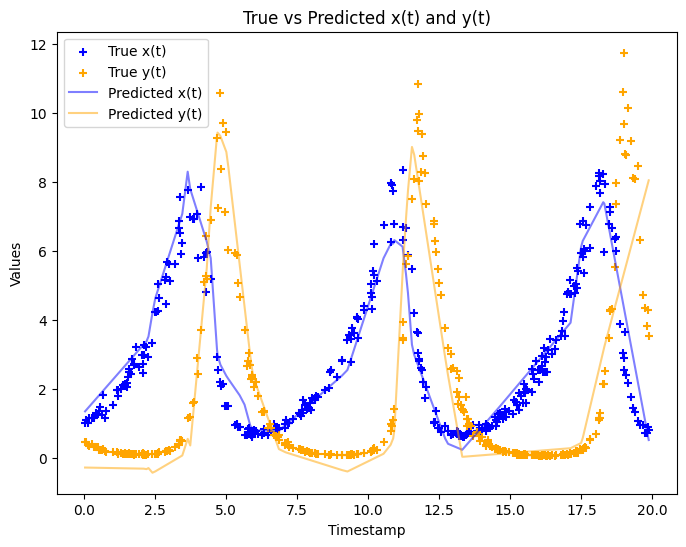

In [ ]:
# Plot results to validate training
def plot_results(model, dataset):
    # Prepare model for evaluation
    model.eval()

    # Collect inputs and true outputs
    times = []
    true_values = []
    predicted_values = []

    with torch.no_grad():  # Disable gradient computation for evaluation
        for i in range(len(dataset)):
            time, true_val = dataset[i]  # extract time and true values from dataset
            pred_val = model(time.unsqueeze(0))  # Predict using the trained model
            times.append(time.item())
            true_values.append(true_val.numpy())
            predicted_values.append(pred_val.numpy()[0])

    # Convert lists to arrays for plotting
    times = torch.tensor(times)
    true_values = torch.tensor(true_values)
    predicted_values = torch.tensor(predicted_values)

    # Plot true vs predicted values for x(t) and y(t) together
    plt.figure(figsize=(8, 6))
    plt.scatter(times, true_values[:, 0], color='blue', marker='+', label='True x(t)' )
    plt.scatter(times, true_values[:, 1], color='orange', marker='+', label='True y(t)')
    plt.plot(times, predicted_values[:, 0], color='blue', label='Predicted x(t)', alpha=0.5)
    plt.plot(times, predicted_values[:, 1], color='orange', label='Predicted y(t)', alpha=0.5)

    plt.xlabel('Timestamp')
    plt.ylabel('Values')
    plt.title('True vs Predicted x(t) and y(t)')
    plt.legend()
    plt.show()

# Call the plotting function to visualize results
plot_results(net, dataset)

# Part 2-2 Time-series extension

The simplified model above will only work well if $t\in[0,20]$.
Create a different model that can extrapolate `x,y` predictions to $t>20$.
Assume that the model has access to the same data as above, and is tasked to predict up to $t=100$. You can change anything in the above setup as needed, including model architecture, loss function, training procedure or data loader.

There are several different correct approaches to tackle this problem, all with different pros and cons, so make sure to explain your reasoning for the different choices made.


## The RNN Approach
#### To solve the problem of extrapolating the predictions for t > 20 up to t = 100, I feel this approach is more capable of generalizing beyond the observed range of the data. The previous model (a simple MLP) might work well for interpolation within the training range but lacks the ability to generalize effectively outside of that range because it does not inherently capture temporal dependencies or trends that extend beyond the observed data.
#### The model is trained using known values up to t=20. After training, the model was able to predict subsequent values iteratively, starting from the last known time step t > 20, the model predicts x(t+1) and y(t+1) using these predicted values as inputs for the next prediction, and so on, until reaching t=100.
#### I came to this choice because of this reasons:
- **Temporal Dependency:** Time-series data is inherently sequential, where the value at the next time step is often dependent on previous values. An RNN-based model, such as an LSTM (Long Short-Term Memory) or GRU (Gated Recurrent Unit), is designed to capture these temporal dependencies, making it more suitable for extrapolation tasks.

- **Extrapolation Ability:** Recurrent models like LSTMs can learn patterns, trends, and dependencies in sequential data that can be extended beyond the range seen during training. By remembering longer-term dependencies and patterns, an LSTM can better predict values outside the range of t∈[0,20].

- **Data Augmentation and Forecasting:** Instead of directly regressing the outputs for all time steps, we can use a sequence forecasting approach, where the model learns to predict the next values in the sequence given the current and past observations.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np


class LSTMNet(nn.Module):
    '''LSTM-based model to regress 2D time series values given a window of past time values.'''
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=2):
        super(LSTMNet, self).__init__()
        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        # Define a fully connected layer to map the LSTM output to the desired output size
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Pass the input through the LSTM layer
        lstm_out, _ = self.lstm(x)
        # Take the output of the last time step
        lstm_out = lstm_out[:, -1, :]
        # Pass it through the fully connected layer to get the final output
        output = self.fc(lstm_out)
        return output


In [ ]:
class TimeSeriesDataset(Dataset):
    '''Custom dataset for time series forecasting with a sliding window approach.'''
    def __init__(self, csv_file, input_window=10, output_window=1):
        self.data = pd.read_csv(csv_file)

        # Ensure all data is numeric, converting any non-numeric values to NaN
        self.data = self.data.apply(pd.to_numeric, errors='coerce')

        # Drop any rows with NaN values after conversion
        self.data.dropna(inplace=True)

        self.time = torch.tensor(self.data['t'].values, dtype=torch.float32)
        self.xy = torch.tensor(self.data[['x', 'y']].values, dtype=torch.float32)
        self.input_window = input_window
        self.output_window = output_window
        self.inputs, self.targets = self.create_sequences()

    def create_sequences(self):
        '''Creates input-output sequences using a sliding window approach.'''
        inputs = []
        targets = []
        for i in range(len(self.time) - self.input_window - self.output_window + 1):
            input_seq = self.time[i:i+self.input_window].unsqueeze(1)
            target_seq = self.xy[i+self.input_window:i+self.input_window+self.output_window]
            inputs.append(input_seq)
            targets.append(target_seq)
        return torch.stack(inputs), torch.stack(targets)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx].squeeze(0)


In [ ]:
# loading the dataset with the Data loader
csv_file = 'https://gist.githubusercontent.com/tmramalho/51733432c88e2b834dbd70353849f887/raw/676636d9e8512963005a318cb9b98060feadb641/data.csv'
dataset = TimeSeriesDataset(csv_file, input_window=10, output_window=1)
BATCH_SIZE = 16
trainloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

# Define the LSTM model
net = LSTMNet()

# Define the loss function and optimizer
loss_fn = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
# Training loop
for epoch in range(300):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 20 == 19:  # Print every 20 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

print('Finished Training')

[1,    20] loss: 10.540
[2,    20] loss: 6.578
[3,    20] loss: 6.522
[4,    20] loss: 6.449
[5,    20] loss: 6.357
[6,    20] loss: 6.323
[7,    20] loss: 6.269
[8,    20] loss: 6.211
[9,    20] loss: 6.190
[10,    20] loss: 6.080
[11,    20] loss: 5.975
[12,    20] loss: 5.899
[13,    20] loss: 5.816
[14,    20] loss: 5.660
[15,    20] loss: 5.297
[16,    20] loss: 5.266
[17,    20] loss: 4.913
[18,    20] loss: 4.742
[19,    20] loss: 4.836
[20,    20] loss: 4.579
[21,    20] loss: 4.501
[22,    20] loss: 4.356
[23,    20] loss: 4.147
[24,    20] loss: 4.055
[25,    20] loss: 4.077
[26,    20] loss: 4.087
[27,    20] loss: 3.750
[28,    20] loss: 3.682
[29,    20] loss: 3.620
[30,    20] loss: 3.755
[31,    20] loss: 3.581
[32,    20] loss: 4.057
[33,    20] loss: 4.991
[34,    20] loss: 4.682
[35,    20] loss: 4.572
[36,    20] loss: 4.346
[37,    20] loss: 4.044
[38,    20] loss: 3.850
[39,    20] loss: 3.664
[40,    20] loss: 3.522
[41,    20] loss: 3.275
[42,    20] loss: 3.480


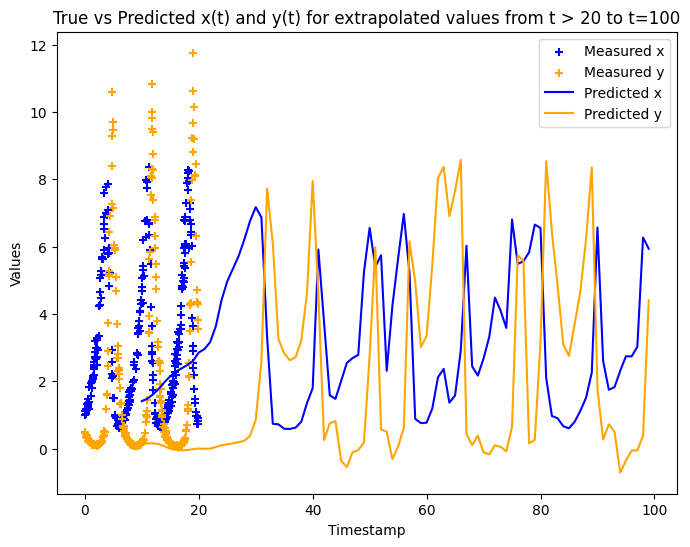

In [ ]:
# Plot results to validate training
# Generate future predictions by iteratively predicting the next value
future_times = torch.arange(10, 100, step=1).float().unsqueeze(1)  # Adjusted to start from 10
predicted = []

# Initialize with the first sequence from the dataset
initial_seq = dataset.time[:10].unsqueeze(1).unsqueeze(0)  # Shape: [1, 10, 1]
current_seq = initial_seq

for t in range(90):
    with torch.no_grad():
        # Predict the next value
        next_value = net(current_seq)  # Shape: [1, 2]

        # Append the predicted value
        predicted.append(next_value.squeeze().numpy())  # Flatten and convert to numpy

        # Update the sequence with the predicted next value
        # Ensure next_value has the correct shape: [1, 1, 1]
        next_value = next_value.unsqueeze(1)  # Shape: [1, 1, 2]
        current_seq = torch.cat((current_seq[:, 1:, :], next_value[:, :, :1]), dim=1)  # Concatenate

predicted = np.array(predicted)

# Plot the true data and the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(dataset.time.numpy(), dataset.xy.numpy()[:, 0], color='blue', marker='+', label='Measured x')
plt.scatter(dataset.time.numpy(), dataset.xy.numpy()[:, 1], color='orange', marker='+', label='Measured y')
plt.plot(range(10, 100), predicted[:, 0], color='blue', label='Predicted x')
plt.plot(range(10, 100), predicted[:, 1], color='orange', label='Predicted y')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('True vs Predicted x(t) and y(t) for extrapolated values from t > 20 to t=100')
plt.legend()
plt.show()

# Part 3-1a

Please implement the below function `min_dist`. This function should take a sparse list of 2D coordinates, and map them to a 2D tensor of a specified resolution. The values of each pixel in the tensor should correspond to the [euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between that pixel and the closest pixel which contains a data point.

You can use either numpy or pytorch tensor operations to implement the function. Use only tensor operations, no for-loops are necessary.

Here are the example outputs for the two test cases highlighted below:

Case 1: data at `[0.4, 0.3], [0.6, 0.7]`, resolution 20 pixels.

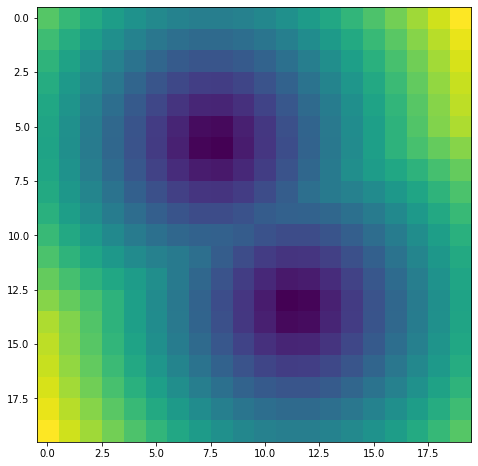


Case 2: data at `[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]`, resolution 256 pixels.

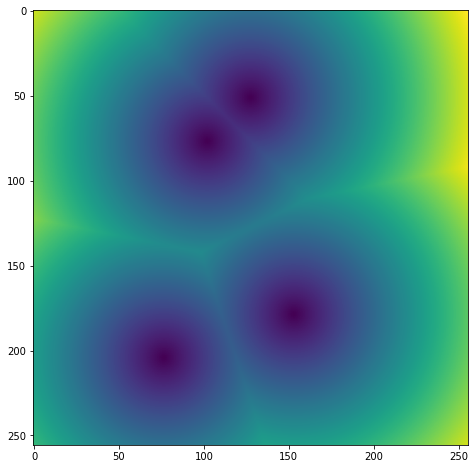


In [ ]:
def min_dist(points, res):
  """Calculates a 2D tensor with the minimum distance from each pixel to data.

  Inputs:
    * points: a python list of 2D coordinates, normalized in the range [0,1]
    * res: the resolution of the output tensor.
  Returns:
    A res x res square tensor with floating point values corresponding to the
    euclidean distance to the closest point in points.
  """
  # Convert points to numpy array and scale to resolution
  points = np.array(points) * (res - 1)

  # Create a grid of (x, y) coordinates
  x = np.arange(res)
  y = np.arange(res)
  xv, yv = np.meshgrid(x, y, indexing='xy')

  # Expand grid dimensions to match points
  grid = np.stack([xv, yv], axis=-1)  # Shape: (res, res, 2)
  grid = grid.reshape(-1, 2)  # Flatten the grid to (res*res, 2)

  # Compute the squared distances from all points to the grid
  dists = np.linalg.norm(grid[:, None, :] - points[None, :, :], axis=2)

  # Find the minimum distance for each pixel in the grid
  min_dists = np.min(dists, axis=1)

  # Reshape back to the 2D grid
  min_dists = min_dists.reshape(res, res)

  return min_dists


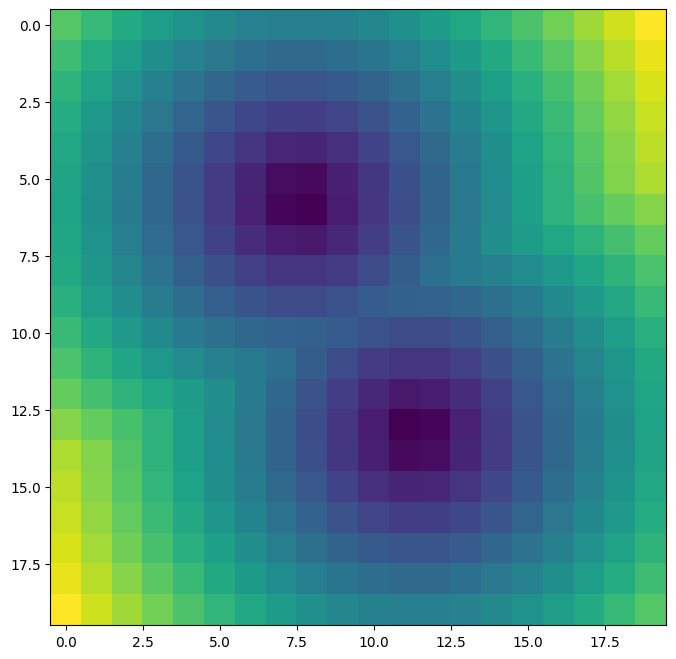

In [ ]:
# Case 1:
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7]], 20)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data)

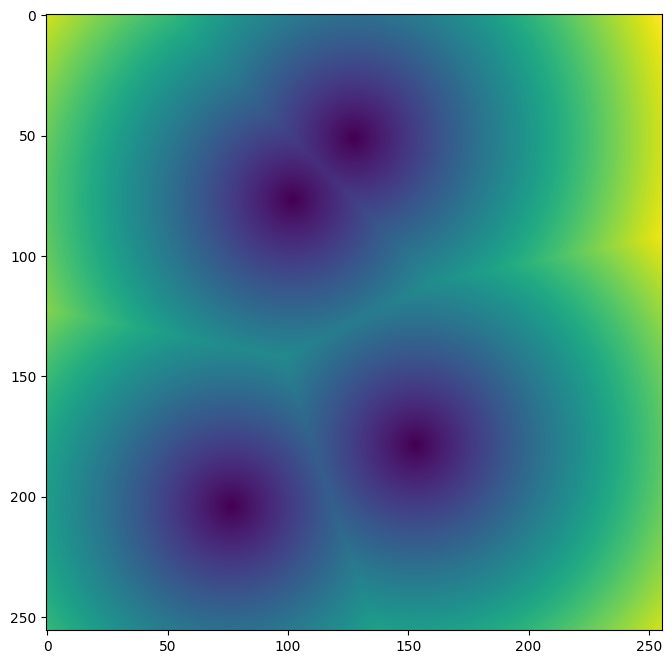

In [ ]:
# Case 2:
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]], 256)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data)

# Part 3-1b: Batched version

As a next step, improve the `min_dist` function to support batches.
The `points` array is now expected to be a tensor with shape [batch_size, num_points, 3], generated by `create_points`.
`min_dist` should return a batch of maps with shape [batch_size, res, res].
Again, make sure to implement `min_dist` using **no for-loops**.
Demonstrate your function output with `batch_size=3` and `num_points=4`.

In [ ]:
def create_points(batch_size, num_points):
  coords = np.random.rand(batch_size, num_points, 2)
  return coords

In [ ]:
def min_dist(points, res):
  """Calculates a 3D tensor with the minimum distance from each pixel to data.

  Inputs:
    * points: a numpy array of 2D coordinates and point values, normalized to
              be in the range [0,1]. The expected shape is [B, P, 2].
    * res: the resolution of the output tensor.
  Returns:
    A res x res square tensor with floating point values corresponding to the
    euclidean distance to the closest point in points. The return tensor
    shape is [B, res, res].
  """
  batch_size, num_points, _ = points.shape

  # Scaling the points to the resolution
  points = points * (res - 1)

  # Creating a grid of (x, y) coordinates for the output resolution
  x = np.arange(res)
  y = np.arange(res)
  xv, yv = np.meshgrid(x, y, indexing='xy')

  # Stacking the grid coordinates and reshaping it for easier distance computation
  grid = np.stack([xv, yv], axis=-1).reshape(-1, 2)  # Shape: (res * res, 2)

  # Expand grid dimensions to match batch size
  grid = grid[None, :, None, :]  # Shape: (1, res*res, 1, 2)
  points = points[:, None, :, :]  # Shape: (B, 1, P, 2)

  # Compute the squared distances from each grid point to each point in the batch
  dists = np.linalg.norm(grid - points, axis=-1)  # Shape: (B, res*res, P)

  # Find the minimum distance for each pixel in each batch
  min_dists = np.min(dists, axis=-1)  # Shape: (B, res*res)

  # Reshape back to the 2D grid
  min_dists = min_dists.reshape(batch_size, res, res)

  return min_dists

In [ ]:
import numpy as np

In [ ]:
batch_size = 3
num_points = 4
res = 20

points = create_points(batch_size, num_points)
output = min_dist(points, res)
print(output.shape)
print(output)

(3, 20, 20)
[[[12.85225397 12.71744793 12.66043173 ...  8.76319914  9.09618668
    9.5230019 ]
  [11.86859358 11.72248111 11.66060089 ...  7.80896319  8.18088376
    8.65296552]
  [10.8879105  10.72845026 10.66080178 ...  6.86776186  7.28787391
    7.81409363]
  ...
  [ 4.87778819  4.51063936  4.34728849 ...  4.22194634  4.84329691
    5.57586039]
  [ 5.78583608  5.4798676   5.34621349 ...  5.08767104  5.61400844
    6.25697889]
  [ 6.7200432   6.45848515  6.34547715 ...  5.99532838  6.44799632
    7.01493768]]

 [[ 3.27205972  2.38663722  1.63881044 ...  5.49908619  5.61756301
    5.90542796]
  [ 3.01954962  2.02665792  1.04737994 ...  4.49959419  4.64364222
    4.98803351]
  [ 3.08690541  2.12571104  1.22813266 ...  3.50039237  3.68372257
    4.10936457]
  ...
  [ 4.00302837  3.95202792  4.14883275 ...  9.52936362 10.21894535
   10.95650114]
  [ 4.990583    4.9497684   5.10827718 ... 10.30011185 10.94122375
   11.6330757 ]
  [ 5.98227392  5.9482678   6.08080408 ... 11.10746763 11.704

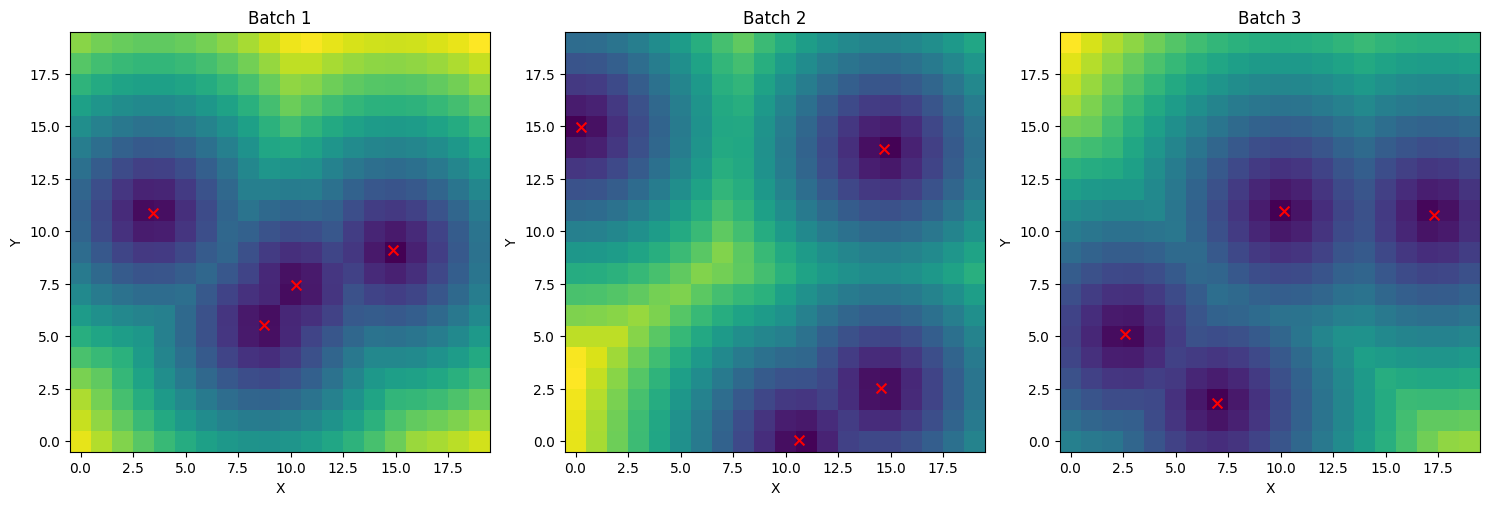

In [ ]:
def plot_distance_maps(distance_maps, points, res):
    """Plots the distance maps for each batch."""
    batch_size = distance_maps.shape[0]

    plt.figure(figsize=(15, 5))

    for i in range(batch_size):
        plt.subplot(1, batch_size, i + 1)
        plt.imshow(distance_maps[i], cmap='viridis', origin='lower')
        # plt.colorbar(label='Distance')
        plt.scatter(points[i, :, 0] * (res - 1), points[i, :, 1] * (res - 1), c='red', s=50, marker='x')
        plt.title(f'Batch {i + 1}')
        plt.xlabel('X')
        plt.ylabel('Y')

    plt.tight_layout()
    plt.show()

batch_size = 3
num_points = 4
res = 20

points = create_points(batch_size, num_points)
distance_maps = min_dist(points, res)

# visualize the results
plot_distance_maps(distance_maps, points, res)

# Part 3-2: Scalable version

Assume `res` can be very large (up to 65,536). Running the above function will likely cause the computer's RAM to be filled up, and fail (on a free colab instance, even 16,384 `res` will crash with `batch_size=3` and `num_points=4`).
Extend the above version of `min_dist` to calculate the result tensor at such high resolution without running out of RAM. This function may be less computationally efficient, as long as it can successfully run.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## less efficient fuction but runs successfully
def min_dist_scalable(points, res, block_size=1024):
    """Calculates a 3D tensor with the minimum distance from each pixel to data using a block-wise approach.

    Inputs:
      * points: a numpy array of 2D coordinates, normalized to be in the range [0,1]. Shape is [B, P, 2].
      * res: the resolution of the output tensor (int).
      * block_size: the size of each block to process to avoid running out of memory.
    Returns:
      A tensor of shape [B, res, res] with floating point values corresponding to the euclidean distance to the closest point in each batch.
    """
    batch_size, num_points, _ = points.shape

    # Scale points to match grid resolution
    points_scaled = points * (res - 1)

    # Initialize result with infinity
    result = np.full((batch_size, res, res), np.inf)

    # Process each block sequentially
    for start_x in range(0, res, block_size):
        for start_y in range(0, res, block_size):
            end_x = min(start_x + block_size, res)
            end_y = min(start_y + block_size, res)

            # Create the grid for this block
            x = np.arange(start_x, end_x)
            y = np.arange(start_y, end_y)
            xv, yv = np.meshgrid(x, y, indexing='ij')
            block_grid = np.stack([xv, yv], axis=-1).reshape(-1, 2)

            # Expand grid dimensions to match batch size
            block_grid_expanded = block_grid[None, :, None, :]  # [1, num_block_pixels, 1, 2]
            points_expanded = points_scaled[:, None, :, :]      # [batch_size, 1, num_points, 2]

            # Compute distances for this block
            dists = np.linalg.norm(block_grid_expanded - points_expanded, axis=-1)  # [batch_size, num_block_pixels, num_points]
            min_dists = np.min(dists, axis=-1)  # [batch_size, num_block_pixels]

            # Reshaping the min_dists to the block size dimensions
            min_dists = min_dists.reshape((batch_size, end_x - start_x, end_y - start_y))

            # Update the result in the corresponding part of the result array
            result[:, start_x:end_x, start_y:end_y] = min_dists

    return result


#### The next code would have been a more efficient way using vectorization but the code crashes due to RAM insuficiency so just skip it and run the next cell

In [ ]:
## More Efficient code using vectorization but runs out of RAM
import numpy as np
import matplotlib.pyplot as plt

def min_dist_scalable(points, res, block_size=1024):
    """Calculates a 3D tensor with the minimum distance from each pixel to data using a chunk-wise approach.

    Inputs:
      * points: a numpy array of 2D coordinates, normalized to be in the range [0,1]. Shape is [B, P, 2].
      * res: the resolution of the output tensor (int).
      * block_size: the size of each block to process to avoid running out of memory.
    Returns:
      A tensor of shape [B, res, res] with floating point values corresponding to the euclidean distance to the closest point in each batch.
    """
    batch_size, num_points, _ = points.shape

    # Scaling of the points to match grid resolution
    points_scaled = points * (res - 1)

    # Initializing the results with infinity
    result = np.full((batch_size, res, res), np.inf)

    # Process in chunks along the y-axis
    for start_y in range(0, res, block_size):
        end_y = min(start_y + block_size, res)

        # Create the grid for this block
        y = np.arange(start_y, end_y)
        x = np.arange(res)
        xv, yv = np.meshgrid(x, y, indexing='ij')
        block_grid = np.stack([xv, yv], axis=-1).reshape(-1, 2)  # Shape [num_block_pixels, 2]

        # Expand grid dimensions to match batch size
        block_grid_expanded = block_grid[None, :, None, :]  # [1, num_block_pixels, 1, 2]
        points_expanded = points_scaled[:, None, :, :]      # [batch_size, 1, num_points, 2]

        # Computing the distances for this block
        dists = np.linalg.norm(block_grid_expanded - points_expanded, axis=-1)  # [batch_size, num_block_pixels, num_points]
        min_dists = np.min(dists, axis=-1)  # [batch_size, num_block_pixels]

        # Reshaping of min_dists to the block size dimensions
        min_dists = min_dists.reshape((batch_size, res, end_y - start_y))

        # Update the result in the corresponding part of the result array
        result[:, :, start_y:end_y] = min_dists

    return result

In [ ]:
# Applying the large resolution of 16384, batch_size=3, number_of_points = 4
batch_size = 3
num_points = 4
res = 16384  # Ensure res is an integer, not a tuple

def create_points(batch_size, num_points):
    coords = np.random.rand(batch_size, num_points, 2)
    return coords

points = create_points(batch_size, num_points)
distance_maps = min_dist_scalable(points, res)


In [ ]:
def plot_distance_maps(distance_maps, points, res):
    """Plots the distance maps for each batch"""
    batch_size = distance_maps.shape[0]
    fig, axs = plt.subplots(1, batch_size, figsize=(15, 5))
    points_rescaled = points * (res - 1)

    for ax, distance_map, batch_points in zip(axs, distance_maps, points_rescaled):
        im = ax.imshow(distance_map, cmap='viridis', origin='lower')
        ax.scatter(batch_points[:, 0], batch_points[:, 1], c='red', s=50, marker='x')
        ax.set_title('Distance Map')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')

    fig.colorbar(im, ax=axs[-1], fraction=0.046, pad=0.04, label='Distance')
    plt.tight_layout()
    plt.show()

# Plot the results
plot_distance_maps(distance_maps, points, res)
